<a href="https://colab.research.google.com/github/Karishma-Kuria/ML-DecisionTree-Regression-Classification/blob/main/Assignment5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **With the football team information from 2009 to 2019 below classification and regression algorithms can predict:**




 1.   Predict if a shot is goal or no goal.
 2.   Predict the result of the match



The dataset contains details of 9,074 games, totaling 941,009 events which were played in the biggest 5 European football leagues: Spain, England, Germany, Italy, France from 2011/2012 season to 2016/2017 season as of 25.01.2017. The dataset contains 3 files:

dictionary.txt
events.csv
ginf.csv

For the problem statement 2nd we have identified new dataset.

In [1]:
# importing relevant libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score

from sklearn import linear_model, tree, ensemble
from sklearn.naive_bayes import GaussianNB
import xgboost
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
import time
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder , MinMaxScaler , LabelEncoder
from sklearn.compose import  ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV

### Loading dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
event_path = "/content/drive/MyDrive/ML_DataSet/events.csv"
info_path = "/content/drive/My Drive/ML_DataSet/ginf.csv"
dict_path = "/content/drive/My Drive/ML_DataSet/dictionary.txt"
game_path_2018_2019 ="https://datahub.io/sports-data/english-premier-league/r/0.csv"
game_path_2017_2018 = "https://datahub.io/sports-data/english-premier-league/r/1.csv"
game_path_2016_2017 = "https://datahub.io/sports-data/english-premier-league/r/2.csv"
game_path_2015_2016 = "https://datahub.io/sports-data/english-premier-league/r/3.csv"
game_path_2014_2015 = "https://datahub.io/sports-data/english-premier-league/r/4.csv"
game_path_2013_2014 = "https://datahub.io/sports-data/english-premier-league/r/5.csv"
game_path_2012_2013 = "https://datahub.io/sports-data/english-premier-league/r/6.csv"
game_path_2011_2012 = "https://datahub.io/sports-data/english-premier-league/r/7.csv"
game_path_2010_2011 = "https://datahub.io/sports-data/english-premier-league/r/8.csv"
game_path_2009_2010 = "https://datahub.io/sports-data/english-premier-league/r/9.csv"

In [5]:
game_events = pd.read_csv(event_path, engine="python")
game_info = pd.read_csv(info_path, engine="python")
game_info.head(5)

,id_odsp,link_odsp,adv_stats,date,league,season,country,ht,at,fthg,ftag,odd_h,odd_d,odd_a,odd_over,odd_under,odd_bts,odd_bts_n
0,UFot0hit/,/soccer/germany/bundesliga-2011-2012/dortmund-...,True,2011-08-05,D1,2012,germany,Borussia Dortmund,Hamburg SV,3,1,1.56,4.41,7.42,NaN,NaN,NaN,NaN
1,Aw5DflLH/,/soccer/germany/bundesliga-2011-2012/augsburg-...,True,2011-08-06,D1,2012,germany,FC Augsburg,SC Freiburg,2,2,2.36,3.60,3.40,NaN,NaN,NaN,NaN
2,bkjpaC6n/,/soccer/germany/bundesliga-2011-2012/werder-br...,True,2011-08-06,D1,2012,germany,Werder Bremen,Kaiserslautern,2,0,1.83,4.20,4.80,NaN,NaN,NaN,NaN
3,CzPV312a/,/soccer/france/ligue-1-2011-2012/paris-sg-lori...,True,2011-08-06,F1,2012,france,Paris Saint-Germain,Lorient,0,1,1.55,4.50,9.40,NaN,NaN,NaN,NaN
4,GUOdmtII/,/soccer/france/ligue-1-2011-2012/caen-valencie...,True,2011-08-06,F1,2012,france,Caen,Valenciennes,1,0,2.50,3.40,3.45,NaN,NaN,NaN,NaN


In [6]:
ds1 = pd.read_csv(game_path_2018_2019) 
ds2 = pd.read_csv(game_path_2017_2018)
ds3 = pd.read_csv(game_path_2016_2017)
ds4 = pd.read_csv(game_path_2015_2016)
ds5 = pd.read_csv(game_path_2014_2015)
ds6 = pd.read_csv(game_path_2013_2014)
ds7 = pd.read_csv(game_path_2012_2013)
ds8 = pd.read_csv(game_path_2011_2012)
ds9 = pd.read_csv(game_path_2010_2011)
ds10 = pd.read_csv(game_path_2009_2010)

frames = [ds1,ds2,ds3,ds4,ds5,ds6,ds7,ds8,ds9,ds10]
game_data = pd.concat(frames,ignore_index=True)
game_data.head(5)

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,SJA,GBH,GBD,GBA,BSH,BSD,BSA,SBH,SBD,SBA
0,E0,10/08/2018,Man United,Leicester,2,1,H,1,0,H,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,E0,11/08/2018,Bournemouth,Cardiff,2,0,H,1,0,H,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,E0,11/08/2018,Fulham,Crystal Palace,0,2,A,0,1,A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,E0,11/08/2018,Huddersfield,Chelsea,0,3,A,0,2,A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,E0,11/08/2018,Newcastle,Tottenham,1,2,A,1,2,A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# shape of the game info and game data
print('Shape of game information dataset''\n',game_info.shape,'\n')
print('Shape of game dataset''\n',game_data.shape)

Shape of game information dataset
 (10112, 18) 

Shape of game dataset
 (3800, 77)


Selected the below features based on the domain knowledge.

In [8]:
game_data = game_data[["FTHG","FTAG","FTR","HTHG","HTAG","HTR","HS","AS"]]

In [9]:
# check for unique values
print('Game info dataset''\n',game_info.index.is_unique, '\n')
print('Game dataset''\n',game_data.index.is_unique)

Game info dataset
 True 

Game dataset
 True


In [10]:
# check for missing values
print('Game info dataset''\n',game_info.isna().sum(), '\n')
print('Game dataset''\n',game_data.isna().sum())

Game info dataset
 id_odsp         0
link_odsp       0
adv_stats       0
date            0
league          0
season          0
country         0
ht              0
at              0
fthg            0
ftag            0
odd_h           0
odd_d           0
odd_a           0
odd_over     9135
odd_under    9135
odd_bts      9135
odd_bts_n    9135
dtype: int64 

Game dataset
 FTHG    0
FTAG    0
FTR     0
HTHG    0
HTAG    0
HTR     0
HS      0
AS      0
dtype: int64


In [11]:
# check the description of numeric variables
game_info.describe()

,season,fthg,ftag,odd_h,odd_d,odd_a,odd_over,odd_under,odd_bts,odd_bts_n
count,10112.000000,10112.000000,10112.000000,10112.000000,10112.000000,10112.000000,977.000000,977.000000,977.000000,977.000000
mean,2014.290249,1.548062,1.154964,2.930120,4.278434,5.537545,2.046817,2.105629,1.942917,2.063941
std,1.610074,1.309591,1.142596,2.370135,1.863643,5.700485,0.367062,0.536646,0.211102,0.251276
min,2012.000000,0.000000,0.000000,1.060000,1.910000,1.110000,1.140000,1.420000,1.410000,1.440000
25%,2013.000000,1.000000,0.000000,1.760000,3.430000,2.740000,1.790000,1.780000,1.800000,1.870000
50%,2014.000000,1.000000,1.000000,2.270000,3.680000,3.860000,2.030000,1.970000,1.920000,2.050000
75%,2016.000000,2.000000,2.000000,3.080000,4.300000,6.000000,2.280000,2.270000,2.050000,2.200000
max,2017.000000,10.000000,9.000000,46.000000,35.000000,81.000000,3.400000,7.500000,3.250000,3.460000


In [12]:
# check for missing data
game_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10112 entries, 0 to 10111
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id_odsp    10112 non-null  object 
 1   link_odsp  10112 non-null  object 
 2   adv_stats  10112 non-null  bool   
 3   date       10112 non-null  object 
 4   league     10112 non-null  object 
 5   season     10112 non-null  int64  
 6   country    10112 non-null  object 
 7   ht         10112 non-null  object 
 8   at         10112 non-null  object 
 9   fthg       10112 non-null  int64  
 10  ftag       10112 non-null  int64  
 11  odd_h      10112 non-null  float64
 12  odd_d      10112 non-null  float64
 13  odd_a      10112 non-null  float64
 14  odd_over   977 non-null    float64
 15  odd_under  977 non-null    float64
 16  odd_bts    977 non-null    float64
 17  odd_bts_n  977 non-null    float64
dtypes: bool(1), float64(7), int64(3), object(7)
memory usage: 1.3+ MB


In [15]:
game_data.describe()

,FTHG,FTAG,HTHG,HTAG,HS,AS
count,3800.000000,3800.000000,3800.000000,3800.000000,3800.000000,3800.000000
mean,1.570526,1.180000,0.691579,0.522368,14.181316,11.229211
std,1.322363,1.160788,0.838739,0.735319,5.514299,4.687029
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,10.000000,8.000000
50%,1.000000,1.000000,0.000000,0.000000,14.000000,11.000000
75%,2.000000,2.000000,1.000000,1.000000,17.000000,14.000000
max,9.000000,7.000000,5.000000,5.000000,43.000000,30.000000


In [16]:
# check for missing data
game_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3800 entries, 0 to 3799
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   FTHG    3800 non-null   int64 
 1   FTAG    3800 non-null   int64 
 2   FTR     3800 non-null   object
 3   HTHG    3800 non-null   int64 
 4   HTAG    3800 non-null   int64 
 5   HTR     3800 non-null   object
 6   HS      3800 non-null   int64 
 7   AS      3800 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 237.6+ KB


# **1. Predicting if the shot is a goal or no goal**

### **Data Visualization and Data Preparation**

Adding columns such as country/league, date into game_events dataset. 

In [15]:
from datetime import datetime
game_events = game_events.merge(game_info[['id_odsp', 'country', 'date']], on='id_odsp', how='left')
year = lambda x: datetime.strptime(x, "%Y-%m-%d").year
game_events['year'] = [year(x) for key, x in enumerate(game_events['date'])]

Created a new dataframe which holds all the details of the shots.

In [16]:
game_shots = game_events[game_events.event_type==1]
game_shots['player'] = game_shots['player'].str.title()
game_shots['player2'] = game_shots['player2'].str.title()
game_shots['country'] = game_shots['country'].str.title()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

 I have visualized the shots placement by the player in the match.

In [17]:
# collecting data for all kind of short placements in match
graph_bar = game_shots[['shot_place', 'id_event']].groupby('shot_place').count().reset_index().rename(columns={'id_event': 'count'})
graph_bar.shot_place = graph_bar.shot_place.astype(int)
graph_bar.shot_place = graph_bar.shot_place.replace({1: 'Bit too high', 2: 'Blocked', 3: 'Bottom left corner', 4: 'Bottom right corner', \
                                        5: 'Centre of the goal', 6: 'High and wide', 7: 'Hits the bar', 8: 'Misses to the left', \
                                        9: 'Misses to the right', 10: 'Too high', 11: 'Top centre of the goal', \
                                        12: 'Top left corner', 13: 'Top right corner'})

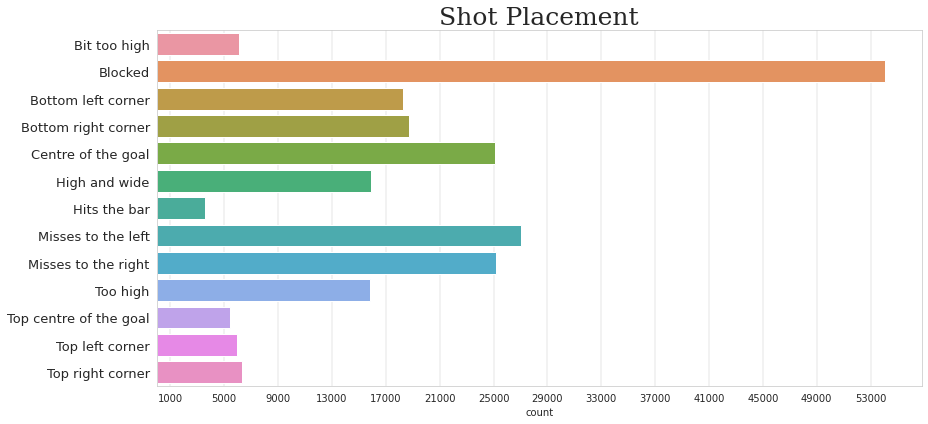

In [18]:
# plot shot placement against their total count 
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=[13,6])
labels = graph_bar['shot_place']
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
ax = sns.barplot(x=graph_bar['count'], y=labels)
ax.set_yticklabels(labels, size = 13)
ax.set_xticks(np.arange(1000,57000,4000))
ax.set_ylabel(ylabel='')
plt.title("Shot Placement", fontsize=25, fontfamily='serif')
plt.tight_layout()
ax.grid(color='black', linestyle='-', linewidth=0.1, axis='x')
plt.show()

From the above plot we can see that maximum number of shots were blocked by the opponent.
From the part of the shots which were unblocked maximum shots were targeted in the centre and many of the shots were missed to the left and right sides. 

Lets visualise the percentage of shots which got converted into goals for different years in the league.

In [19]:
game_goals  = game_shots[['is_goal', 'id_event', 'year']].groupby(['is_goal', 'year']).count().reset_index().rename(columns={'id_event': 'count'})
game_goals.is_goal = game_goals.is_goal.replace({1: 'Goal', 0: 'No Goal'})

In [20]:
game_goals['percentage']=0
for i in range(len(game_goals)):
    for year in game_goals.year.unique():
        if game_goals.iloc[i,game_goals.columns.get_loc("year")]==year:
            game_goals.iloc[i,game_goals.columns.get_loc("percentage")]=game_goals.iloc[i,game_goals.columns.get_loc("count")] / \
                                                            game_goals[game_goals.year==year]['count'].sum()
game_goals['percentage']=round(game_goals['percentage']*100,2)

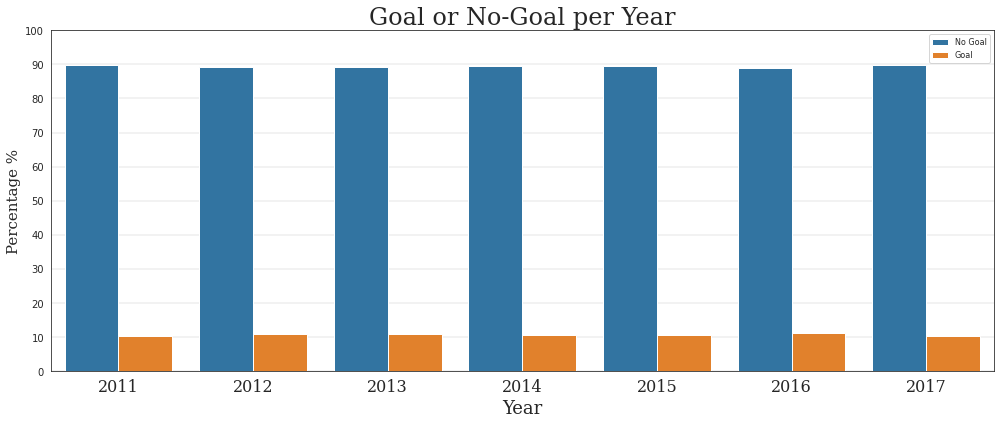

In [21]:
# plot the percentage of goals against year
sns.set_style("white")
fig, ax = plt.subplots(figsize=[14,6])
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
ax = sns.barplot(data=game_goals, y='percentage', hue='is_goal', x='year')
ax.set_yticks(np.arange(0,110,10))
ax.set_ylabel(ylabel='Percentage %', fontsize=15, fontfamily='serif')
ax.set_xlabel(xlabel='Year', fontsize=18, fontfamily='serif')
ax.set_xticklabels(labels=ax.get_xticklabels(), fontsize=16, fontfamily='serif')
plt.title("Goal or No-Goal per Year", fontsize=24, fontfamily='serif')
plt.tight_layout()
ax.grid(color='black', linestyle='-', linewidth=0.1, axis='y')
plt.legend(fontsize=8)
plt.show()

So again from the above graph the percentage of goals is almost same for the mentioned years. So it can be concluded that 1 out of every 9-10 shot is a goal no matter where it was shot.

Now I lets prepare the data for our Expected goal model. This model will evaluate how likely a shot is supposed to turn into a goal. I have divided data into 2 sets:
 For this 

1.   Y: the target variable Y set will include all the shots in the database irrespective of the fact that its a goal or not.
2.   X: It will include all necessary information we have in dataset for shots such as bodypart, location, situation, fast_break.

  

In [22]:
# converting all categorical variable into binary dummies
df = pd.get_dummies(game_shots.iloc[:,-8:-3], columns=['location', 'bodypart','assist_method', 'situation'])
df.columns = ['fast_break', 'loc_centre_box', 'loc_diff_angle_lr', 'diff_angle_left', 'diff_angle_right',
                'left_side_box', 'left_side_6ybox', 'right_side_box', 'right_side_6ybox', 'close_range',
                'penalty', 'outside_box', 'long_range', 'more_35y', 'more_40y', 'not_recorded', 'right_foot', 
                'left_foot', 'header', 'no_assist', 'assist_pass', 'assist_cross', 'assist_header',
                'assist_through_ball', 'open_play', 'set_piece', 'corner', 'free_kick']
df['is_goal'] = game_shots['is_goal']

In [23]:
print("Total number of shots",len(df))
print("Total number of goals",df.is_goal.sum())

Total number of shots 229135
Total number of goals 24441


### **Data Preparation and Test/Train Split.**

In [24]:
# split dataset into test and train
x = df.iloc[:,:-1]
y = df.iloc[:,-1]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.35, random_state=1)
x_train

,fast_break,loc_centre_box,loc_diff_angle_lr,diff_angle_left,diff_angle_right,left_side_box,left_side_6ybox,right_side_box,right_side_6ybox,close_range,...,header,no_assist,assist_pass,assist_cross,assist_header,assist_through_ball,open_play,set_piece,corner,free_kick
536019,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
241887,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
848312,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
463302,0,1,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,1,0,0,0
44032,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213888,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
940932,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
22359,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
857752,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0


## **Classification**

### **Gradient Boost Classifier**

In [25]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import average_precision_score, roc_auc_score, f1_score, precision_score, \
recall_score, cohen_kappa_score, classification_report,confusion_matrix
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials

def evaluate_model_result(params): 
    model = GradientBoostingClassifier(
                        learning_rate=params['learning_rate'],
                        min_samples_leaf=params['min_samples_leaf'],
                        max_depth = params['max_depth'],
                        max_features = params['max_features']
                        )

    model.fit(x_train, y_train)
    return {
        'learning_rate': params['learning_rate'],
        'min_samples_leaf': params['min_samples_leaf'],
        'max_depth': params['max_depth'],
        'max_features': params['max_features'],
        'train_ROCAUC': roc_auc_score(y_train, model.predict_proba(x_train)[:, 1]),
        'test_ROCAUC': roc_auc_score(y_test, model.predict_proba(x_test)[:, 1]),
        'recall': recall_score(y_test, model.predict(x_test)),
        'precision': precision_score(y_test, model.predict(x_test)),
        'f1_score': f1_score(y_test, model.predict(x_test)),
        'train_accuracy': model.score(x_train, y_train),
        'test_accuracy': model.score(x_test, y_test),
    }

def objective(params):
    res = evaluate_model_result(params)
    
    res['loss'] = - res['test_ROCAUC'] 
    res['status'] = STATUS_OK 
    return res 

space_hyperparameter = {
        'learning_rate': hp.uniform('learning_rate', 0.05, 0.3),
        'min_samples_leaf': hp.choice('min_samples_leaf', range(15, 200)),
        'max_depth': hp.choice('max_depth', range(2, 20)),
        'max_features': hp.choice('max_features', range(3, 27))
}

In [26]:
trials_val = Trials()
fmin(
    objective,
    space=space_hyperparameter,
    algo=tpe.suggest,
    max_evals=50,
    trials=trials_val
);

100%|██████████| 50/50 [15:08<00:00, 18.16s/it, best loss: -0.8194091032886422]


In [27]:
pd.DataFrame(trials_val.results).sort_values(by='f1_score', ascending=False).head(5)

,learning_rate,min_samples_leaf,max_depth,max_features,train_ROCAUC,test_ROCAUC,recall,precision,f1_score,train_accuracy,test_accuracy,loss,status
18,0.109859,27,18,20,0.819222,0.818181,0.269285,0.710518,0.390552,0.910593,0.910883,-0.818181,ok
3,0.199759,148,10,6,0.818198,0.819075,0.268462,0.714778,0.390323,0.910358,0.911070,-0.819075,ok
1,0.119308,43,7,5,0.817915,0.819215,0.267992,0.715317,0.389906,0.910452,0.911070,-0.819215,ok
12,0.130094,19,10,17,0.819079,0.818196,0.268462,0.711658,0.389857,0.910580,0.910896,-0.818196,ok
24,0.279951,143,9,23,0.818414,0.818807,0.267992,0.714644,0.389806,0.910459,0.911033,-0.818807,ok


From the above table it is clear that with hyperparameter I have got good results. It can also be concluded that there is no sign of overfitting that means the model will work for both test and training data.

**Model Training**

In [28]:
GBC_model = GradientBoostingClassifier(
                        learning_rate=0.285508,
                        min_samples_leaf=99,
                        max_depth = 19,
                        max_features = 27
                        )
GBC_model.fit(x_train, y_train)

GradientBoostingClassifier(learning_rate=0.285508, max_depth=19,
                           max_features=27, min_samples_leaf=99)

**Check the accuracy of the model**

In [29]:
print('Total example in test set {} (shots) of which {} are certainly (goals).'.format(len(y_test), y_test.sum()),'\n')
print('Classifying accuracy of whether a shot is goal or not is {}%.'.format(round(GBC_model.score(x_test, y_test)*100),2),'\n')
print('GBC classifier obtains an ROC-AUC of {}%'.format(round(roc_auc_score(y_test, GBC_model.predict_proba(x_test)[:, 1])*100),2), '\n')

Total example in test set 80198 (shots) of which 8504 are certainly (goals). 

Classifying accuracy of whether a shot is goal or not is 91%. 

GBC classifier obtains an ROC-AUC of 82% 



So I have acheived 91% accuracy of the prediction of correct goals. Also I have got promissing ROC-AUC metric whic is 82%.

**Confusion matrix**

In [30]:
con_m=confusion_matrix(y_train,GBC_model.predict(x_train))
con_m=pd.DataFrame(con_m)
con_m.columns=["Predicted No Goals","Predicted Goals"]
con_m.index=["Actual No Goals","Actual Goals"]
print(con_m, '\n')
print(classification_report(y_test,GBC_model.predict(x_test)))

                 Predicted No Goals  Predicted Goals
Actual No Goals              131342             1658
Actual Goals                  11660             4277 

              precision    recall  f1-score   support

           0       0.92      0.99      0.95     71694
           1       0.71      0.27      0.39      8504

    accuracy                           0.91     80198
   macro avg       0.82      0.63      0.67     80198
weighted avg       0.90      0.91      0.89     80198



The confusion matrix is used to analyse the performance of the prediction. The results shows that the model performs much better for predicting if its not a goal.

### **Classification using Decision tree and various other classificstion algorithm.**

In [31]:
from sklearn import tree
decision_Tree_class = tree.DecisionTreeClassifier()
decision_Tree_class = decision_Tree_class.fit(x,y)

Implementing Muller Loop to run it on the training dataset against following algorithms:

1.   NaiveBayes Classifier
2.   KNN Classifier
3.   RandomForest Classifier
4.   XGB Classifier
5. DecisionTreeClassifier

In [32]:
class_algo = ["DecisionTreeClassifier", "RandomForest Classifier","KNN Classifier", 
         "NaiveBayes Classifier", 
         "XGB Classifier", ]

classifiers = [
    DecisionTreeClassifier(),
    ensemble.RandomForestClassifier(),
    KNeighborsClassifier(),
    GaussianNB(),
    XGBClassifier(),
    ]

max_score = 0.0
max_class = ''
score_list = []
clf_list = []

# iterate over classifiers
for algo, clf in zip(class_algo, classifiers):
    start_time = time.time()
    clf.fit(x_train, y_train)
    score = 100.0 * clf.score(x_test, y_test)
    score_list.append(score)
    clf_list.append(algo)
    print('Classification  Algorithm = %s, Score (test, accuracy) = %.2f,' %(algo, score), 'Training time = %.2f seconds' % (time.time() - start_time))
    
    if score > max_score:
        clf_best = clf
        max_score = score
        max_class = algo


Classification  Algorithm = DecisionTreeClassifier, Score (test, accuracy) = 91.08, Training time = 0.35 seconds
Classification  Algorithm = RandomForest Classifier, Score (test, accuracy) = 91.09, Training time = 9.18 seconds
Classification  Algorithm = KNN Classifier, Score (test, accuracy) = 89.10, Training time = 222.57 seconds
Classification  Algorithm = NaiveBayes Classifier, Score (test, accuracy) = 84.66, Training time = 0.20 seconds
Classification  Algorithm = XGB Classifier, Score (test, accuracy) = 91.10, Training time = 12.24 seconds


So as per the result of classification XGBoost classifier has performed best among others.

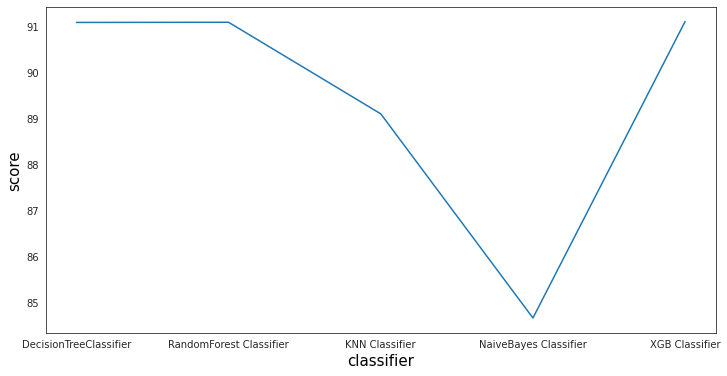

In [33]:
plt.figure(figsize=(12,6))
plt.plot(clf_list,score_list)
plt.xlabel("classifier",size=15,color="Black")
plt.ylabel("score",size=15,color="Black");

## **Regression**

### **Logistic Regression**

Implementing Muller Loop to run it on the training dataset against following Regression algorithms and display their accuracy:



1.   LinearRegression
2.   MLPRegressor
3. LogisticRegression
4. RandomForestRegressor
5. AdaBoost
6. KNNRegressor

In [34]:
LR_model = LogisticRegression(max_iter=400)
LR_model.fit(x_train, y_train)

LogisticRegression(max_iter=400)

In [35]:
regression_algos = ["LogisticRegression","AdaBoost", "MLPRegressor", 
                    "LinearRegression", "KNNRegressor","RandomForestRegressor"
                   ]

classifiers = [
    LogisticRegression(),
    AdaBoostRegressor(random_state=0, n_estimators=100),
    MLPRegressor(random_state=1, max_iter=800),
    LinearRegression(),
    KNeighborsRegressor(n_neighbors=2),
    RandomForestRegressor(max_depth=2, random_state=0),
    ]


max_score = 0.0
max_class = ''
score_list = []
clf_list = []

# iterate over classifiers
for algo, clf in zip(regression_algos, classifiers):
    start_time = time.time()
    clf.fit(x_train, y_train)
    score = 100.0 * clf.score(x_test, y_test)
    score_list.append(score)
    clf_list.append(algo)
    print('Regression  Algorithm = %s, Score (test, accuracy) = %.2f,' %(algo, score), 'Training time = %.2f seconds' % (time.time() - start_time))
    if score > max_score:
        clf_best = clf
        max_score = score
        max_class = algo

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Regression  Algorithm = LogisticRegression, Score (test, accuracy) = 91.10, Training time = 3.05 seconds
Regression  Algorithm = AdaBoost, Score (test, accuracy) = 15.97, Training time = 2.20 seconds
Regression  Algorithm = MLPRegressor, Score (test, accuracy) = 23.20, Training time = 12.86 seconds
Regression  Algorithm = LinearRegression, Score (test, accuracy) = 22.87, Training time = 0.24 seconds
Regression  Algorithm = KNNRegressor, Score (test, accuracy) = -4.42, Training time = 144.40 seconds
Regression  Algorithm = RandomForestRegressor, Score (test, accuracy) = 13.87, Training time = 4.95 seconds


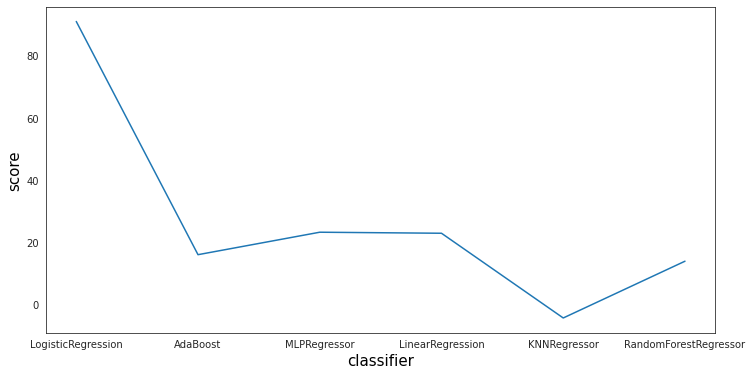

In [36]:
# plot the output score for all the algos
from IPython.core.pylabtools import figsize
from matplotlib import figure

plt.figure(figsize=(12,6))
plt.plot(clf_list,score_list)
plt.xlabel("classifier",size=15,color="Black")
plt.ylabel("score",size=15,color="Black");

As per the result above Logistic Regression has performed best in this case.

# **2. Predict which team (Home Team / Away Team) can win the match.**

### **Data Preparation**

Let's check if we have a balanced dataset for game data.

In [17]:
game_data["FTR"].value_counts()

H    1758
A    1102
D     940
Name: FTR, dtype: int64

So as per the above information our data is not well balanced since the number of home results are more.

Determining Latent Variables.

**Latent Variable# 1**

**Away Hit Rate**: It is a rate at which away teams scored a goal against total shots played. It is calculated by taking the ratio of Full time away goals and total away shots.

The AWR is determined by the following formula:

Away Hit Rate = $\frac{Full Time Away Goals}{Away Shots}$

In [18]:
game_data["AHR"] = game_data["FTAG"]/game_data["AS"]

**Latent Variable# 2**

**The Total Shots Ratio (TSR)**: It is a rate to visualize how well teams play a match when it comes to conceding and taking shots.

TSR = $\frac{Total shots for}{Total shots for + total shots against}$

In [19]:
game_data["TSR"] = game_data["HS"] / (game_data["HS"] + game_data["AS"])

**Latent Variable# 3**

**Home Hit Rate(HHR)**: It is a rate at which home teams scored a goal against total shots played. It is calculated by taking the ratio of Full time home goals and total home shots.

Home Hit Rate = $\frac{Full Time Home Goal}{Home Shots}$

In [20]:
game_data["HHR"] = game_data["FTHG"]/game_data["HS"]

In [21]:
game_data.drop(columns=["HS","AS"], inplace=True)
game_data;

### **Univariant analysis: single attribute analysis**

Full time result(FTR) for each result outcome.

In [22]:
game_data["FTR"].value_counts()

H    1758
A    1102
D     940
Name: FTR, dtype: int64

Text(0, 0.5, 'Count')

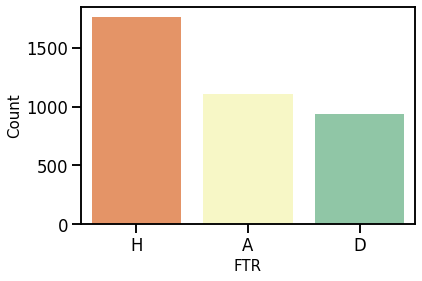

In [23]:
sns.set_context('talk', font_scale = 1)
sns.countplot(data=game_data,x="FTR",palette="Spectral",)
plt.xlabel("FTR",size=15,color="Black")
plt.ylabel("Count",size=15,color="Black")

**Observation**:

1.   As per the counts shown above, it is clear that home team has more wins.
2.   It can also be infered that the Away team is more likely to loose or get a draw.



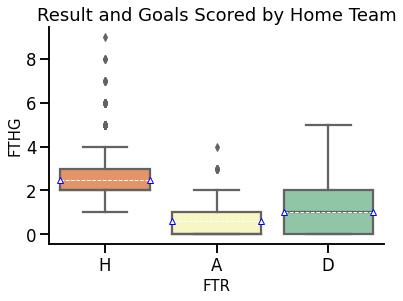

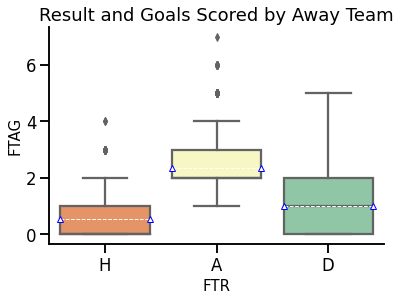

In [25]:
sns.boxplot(data=game_data,x="FTR",y="FTHG",palette="Spectral", \
            meanline=True,showmeans=True,\
            meanprops={"marker":"^","markerfacecolor":"white", "markeredgecolor":"blue","color":"White"})
sns.despine()
plt.title("Result and Goals Scored by Home Team")
plt.xlabel("FTR",size=15,color="Black")
plt.ylabel("FTHG",size=15,color="Black")
plt.show()

sns.boxplot(data=game_data,x="FTR",y="FTAG",palette="Spectral", \
            meanline=True,showmeans=True,\
            meanprops={"marker":"^","markerfacecolor":"white", "markeredgecolor":"blue","color":"White"})
sns.despine()
plt.title("Result and Goals Scored by Away Team")
plt.xlabel("FTR",size=15,color="Black")
plt.ylabel("FTAG",size=15,color="Black")
plt.show()

**Observation**:

**Away Team** :

1.   The winning score goalmean is 2.1.
2.   If its a draw then the mean is 0.9 goals.
3.   In the case of lossing the match the mean is 0.6 goals.

**Home Team** :


1.   The winning score goalmean is 2.5.
2.   If its a draw then the mean is 0.9 goals.
3.   In the case of lossing the match the mean is 0.5 goals.

In conclusion Home team has scored more goals.





## **Bi-Variate analysis**

Lets visualize the relationship between features by plotting a pairplot graphs.

In [26]:
game_data.index

RangeIndex(start=0, stop=3800, step=1)

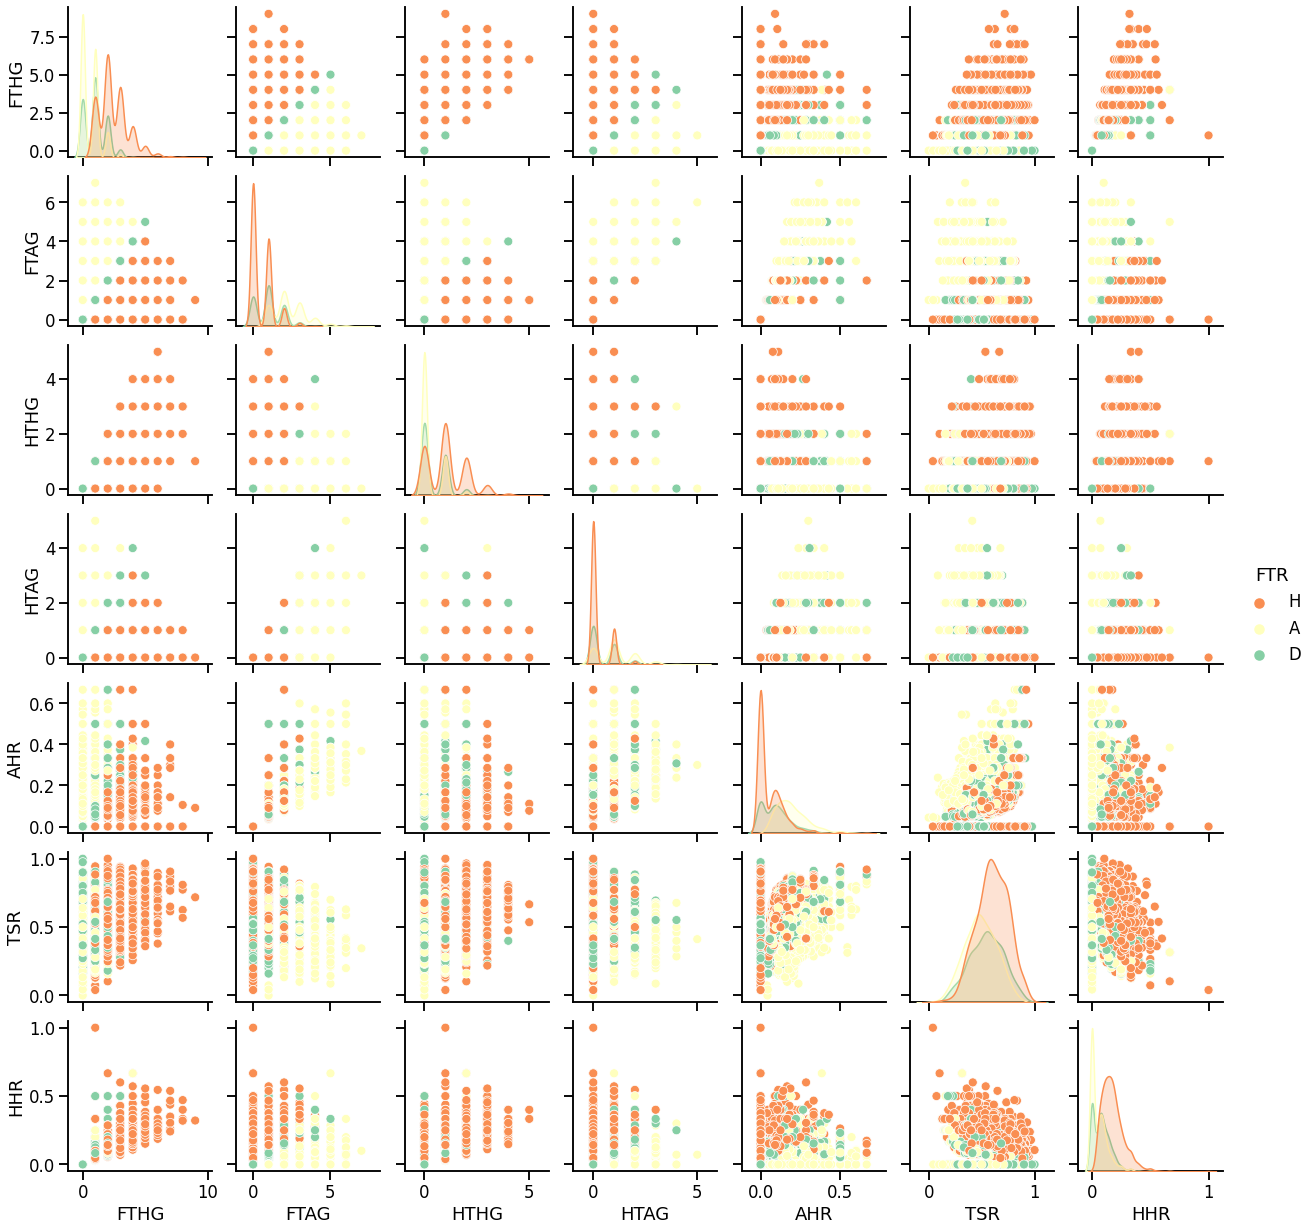

In [27]:
sns.pairplot(game_data,hue="FTR",palette="Spectral")



**Observations:**

FTAG (Full time Away Goal) and FTHG (Full time Home Goal)   are the main features which clearly explains who will win.  So to predict full time result (FTR) these two features can be used.

So the team which has maximum goals in the match wins the match.


Let's check if the team just wins at Half time or does they win full match.

Text(0, 0.5, 'Count')

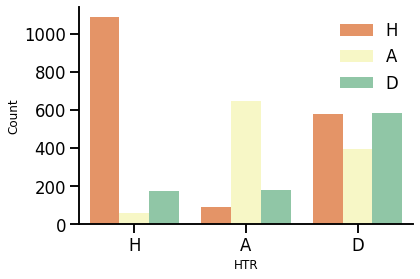

In [28]:
sns.countplot(data=game_data,x="HTR",hue="FTR",palette="Spectral")
plt.legend(edgecolor="White",facecolor="White")
sns.despine()
plt.xlabel("HTR",size=12,color="Black")
plt.ylabel("Count",size=12,color="Black")

**Graph Description**:

H : Shows that Home team leading at Half Time.

A : Shows that Away team leading at Half Time.

D : Shows that game was level at Half Time.

Blue Bar shows the count when team Won.

Orange Bar shows the count when team had a Draw.

Green Bar shows the count when team Lost the game at Full time.

**Observation**:

The team which Leads the Half Time almost always goes on to winning the game at Full time.

If at Half Time the game is leveled than it is more likely that Home team will win the match as compared to Away team. Although most likely the outcome is a Draw.

**Conclusion**
1. There HTR (Half Time Result) is crutial feature to determine who will win the match.
2. Goals scored at Full time for both Away and Home determines the overall result of the match.
3. There is a higher chances of Home team winning the match.



##**Data Prepartion - Train/Test split Dataset**

**Determine continous and categorical features.**

In [29]:
categorical_cols = game_data.dtypes[game_data.dtypes == object]
categorical_cols

FTR    object
HTR    object
dtype: object

In [30]:
# filter by categorical strings 
categorical_cols = game_data.dtypes[game_data.dtypes == object]  
categorical_cols = categorical_cols.index.tolist()  # list of categorical fields

game_data[categorical_cols].head().T

,0,1,2,3,4
FTR,H,H,A,A,A
HTR,H,H,A,A,A


In [31]:
game_data

,FTHG,FTAG,FTR,HTHG,HTAG,HTR,AHR,TSR,HHR
0,2,1,H,1,0,H,0.076923,0.380952,0.250000
1,2,0,H,1,0,H,0.000000,0.545455,0.166667
2,0,2,A,0,1,A,0.200000,0.600000,0.000000
3,0,3,A,0,2,A,0.230769,0.315789,0.000000
4,1,2,A,1,2,A,0.133333,0.500000,0.066667
...,...,...,...,...,...,...,...,...,...
3795,1,0,H,0,0,D,0.000000,0.677419,0.047619
3796,0,0,D,0,0,D,0.000000,0.366667,0.000000
3797,4,0,H,2,0,H,0.000000,0.818182,0.222222
3798,1,1,D,1,1,D,0.058824,0.413793,0.083333


Encode FTR (Full Time Result) which is target column

In [32]:
from sklearn.preprocessing import LabelEncoder

target_labelencoder = LabelEncoder()
game_data['target_feat'] = target_labelencoder.fit_transform(game_data['FTR'])
game_data.info

<bound method DataFrame.info of       FTHG  FTAG FTR  HTHG  HTAG HTR       AHR       TSR       HHR  \
0        2     1   H     1     0   H  0.076923  0.380952  0.250000   
1        2     0   H     1     0   H  0.000000  0.545455  0.166667   
2        0     2   A     0     1   A  0.200000  0.600000  0.000000   
3        0     3   A     0     2   A  0.230769  0.315789  0.000000   
4        1     2   A     1     2   A  0.133333  0.500000  0.066667   
...    ...   ...  ..   ...   ...  ..       ...       ...       ...   
3795     1     0   H     0     0   D  0.000000  0.677419  0.047619   
3796     0     0   D     0     0   D  0.000000  0.366667  0.000000   
3797     4     0   H     2     0   H  0.000000  0.818182  0.222222   
3798     1     1   D     1     1   D  0.058824  0.413793  0.083333   
3799     2     1   H     1     1   D  0.090909  0.560000  0.142857   

      target_feat  
0               2  
1               2  
2               0  
3               0  
4               0  
...    

In [33]:
target_cat = ['H','A','D']

Using OneHot Encoding to Encode the categorical feature. Also using MinMax Scaler to standarize the numerical features.

In [34]:
categorical_feature = ["HTR"]
numerical_features = ["FTAG","FTHG","HTAG","HTHG"]
y = game_data['target_feat'].values
X = game_data[categorical_feature + numerical_features]
colum_transformer = ColumnTransformer([('numerical', MinMaxScaler(), numerical_features),('categorical', OneHotEncoder(), categorical_feature),], remainder='passthrough')
X = colum_transformer.fit_transform(X)
print(X)

[[0.14285714 0.22222222 0.         ... 0.         0.         1.        ]
 [0.         0.22222222 0.         ... 0.         0.         1.        ]
 [0.28571429 0.         0.2        ... 1.         0.         0.        ]
 ...
 [0.         0.44444444 0.         ... 0.         0.         1.        ]
 [0.14285714 0.11111111 0.2        ... 0.         1.         0.        ]
 [0.14285714 0.22222222 0.2        ... 0.         1.         0.        ]]


In [35]:
column_names = colum_transformer.get_feature_names_out()
column_names 

array(['numerical__FTAG', 'numerical__FTHG', 'numerical__HTAG',
       'numerical__HTHG', 'categorical__HTR_A', 'categorical__HTR_D',
       'categorical__HTR_H'], dtype=object)

In [36]:
print('Shape of X',X.shape, '\n')
print('Shape of y',y.shape, '\n')

Shape of X (3800, 7) 

Shape of y (3800,) 



In [37]:
# split dataset into test and train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 42)

## **Regression**

Implementing Muller Loop to run it on the training dataset against following Regression algorithms and display their accuracy:

1. LinearRegression
2. LogisticRegression
3. MLPRegressor
4. RandomForestRegressor
5. AdaBoost
6. KNNRegressor

In [38]:
regression_algos = ["LogisticRegression","AdaBoost", "MLPRegressor", 
                    "LinearRegression", "KNNRegressor","RandomForestRegressor"
                   ]

classifiers = [
    LogisticRegression(),
    AdaBoostRegressor(random_state=0, n_estimators=100),
    MLPRegressor(random_state=1, max_iter=800),
    LinearRegression(),
    KNeighborsRegressor(n_neighbors=2),
    RandomForestRegressor(max_depth=2, random_state=0),
    ]


max_score = 0.0
max_class = ''
score_list = []
clf_list = []

# iterate over classifiers
for algo, clf in zip(regression_algos, classifiers):
    start_time = time.time()
    clf.fit(X_train, y_train)
    score = 100.0 * clf.score(X_test, y_test)
    score_list.append(score)
    clf_list.append(algo)
    print('Regression  Classifier = %s, Score (test, accuracy) = %.2f,' %(algo, score), 'Training time = %.2f seconds' % (time.time() - start_time))
    
    if score > max_score:
        clf_best = clf
        max_score = score
        max_class = algo

Regression  Classifier = LogisticRegression, Score (test, accuracy) = 96.12, Training time = 0.08 seconds
Regression  Classifier = AdaBoost, Score (test, accuracy) = 91.15, Training time = 0.28 seconds
Regression  Classifier = MLPRegressor, Score (test, accuracy) = 99.22, Training time = 2.69 seconds
Regression  Classifier = LinearRegression, Score (test, accuracy) = 74.81, Training time = 0.00 seconds
Regression  Classifier = KNNRegressor, Score (test, accuracy) = 99.24, Training time = 0.05 seconds
Regression  Classifier = RandomForestRegressor, Score (test, accuracy) = 75.75, Training time = 0.22 seconds


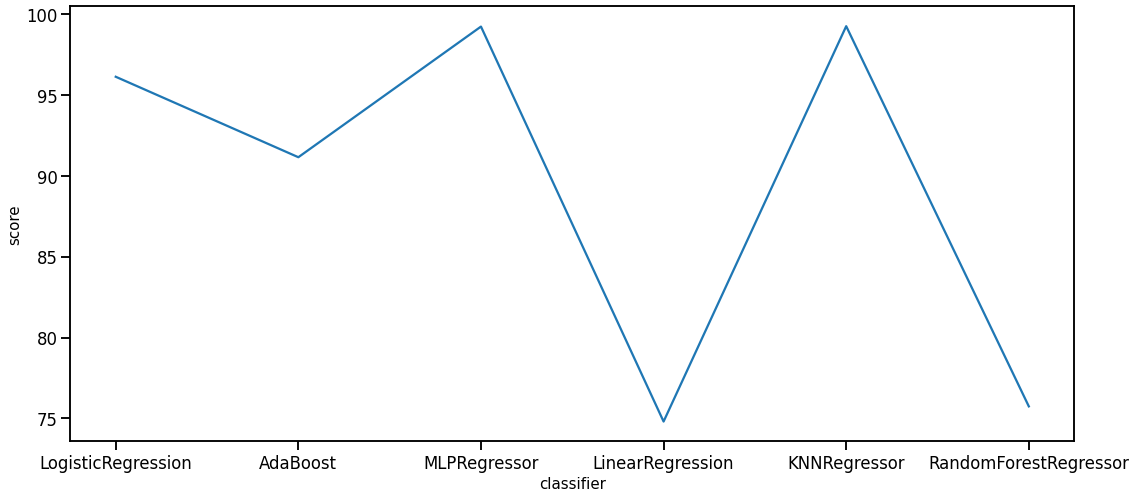

In [44]:
# plot the output score for all the algos
from IPython.core.pylabtools import figsize
from matplotlib import figure

plt.figure(figsize=(18,8))
plt.plot(clf_list,score_list)
plt.xlabel("classifier",size=15,color="Black")
plt.ylabel("score",size=15,color="Black");

## **Classification using Decision Tree**

In [45]:
from sklearn import tree

decision_Tree_class = tree.DecisionTreeClassifier()
decision_Tree_class = decision_Tree_class.fit(X,y)

[Text(0.36363636363636365, 0.9444444444444444, 'X[1] <= 0.167\ngini = 0.641\nsamples = 3800\nvalue = [1102, 940, 1758]'),
 Text(0.22727272727272727, 0.8333333333333334, 'X[0] <= 0.214\ngini = 0.622\nsamples = 2054\nvalue = [989, 688, 377]'),
 Text(0.18181818181818182, 0.7222222222222222, 'X[0] <= 0.071\ngini = 0.609\nsamples = 1318\nvalue = [253, 688, 377]'),
 Text(0.09090909090909091, 0.6111111111111112, 'X[1] <= 0.056\ngini = 0.491\nsamples = 667\nvalue = [0, 290, 377]'),
 Text(0.045454545454545456, 0.5, 'gini = 0.0\nsamples = 290\nvalue = [0, 290, 0]'),
 Text(0.13636363636363635, 0.5, 'gini = 0.0\nsamples = 377\nvalue = [0, 0, 377]'),
 Text(0.2727272727272727, 0.6111111111111112, 'X[1] <= 0.056\ngini = 0.475\nsamples = 651\nvalue = [253, 398, 0]'),
 Text(0.22727272727272727, 0.5, 'gini = 0.0\nsamples = 253\nvalue = [253, 0, 0]'),
 Text(0.3181818181818182, 0.5, 'gini = 0.0\nsamples = 398\nvalue = [0, 398, 0]'),
 Text(0.2727272727272727, 0.7222222222222222, 'gini = 0.0\nsamples = 736\

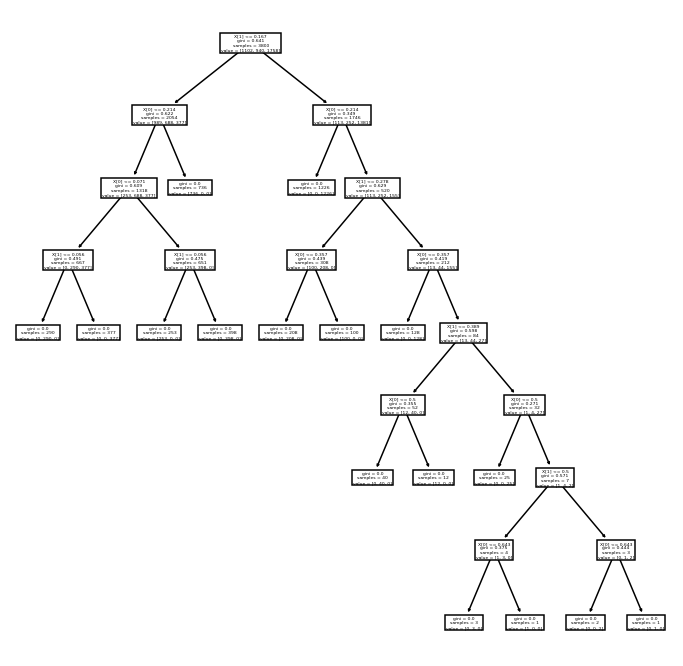

In [46]:
plt.figure(figsize=(12,12))
tree.plot_tree(decision_Tree_class)

In [47]:
import graphviz 
data = tree.export_graphviz(decision_Tree_class, out_file=None) 
graph_val = graphviz.Source(data) 
graph_val.render("Football")

'Football.pdf'

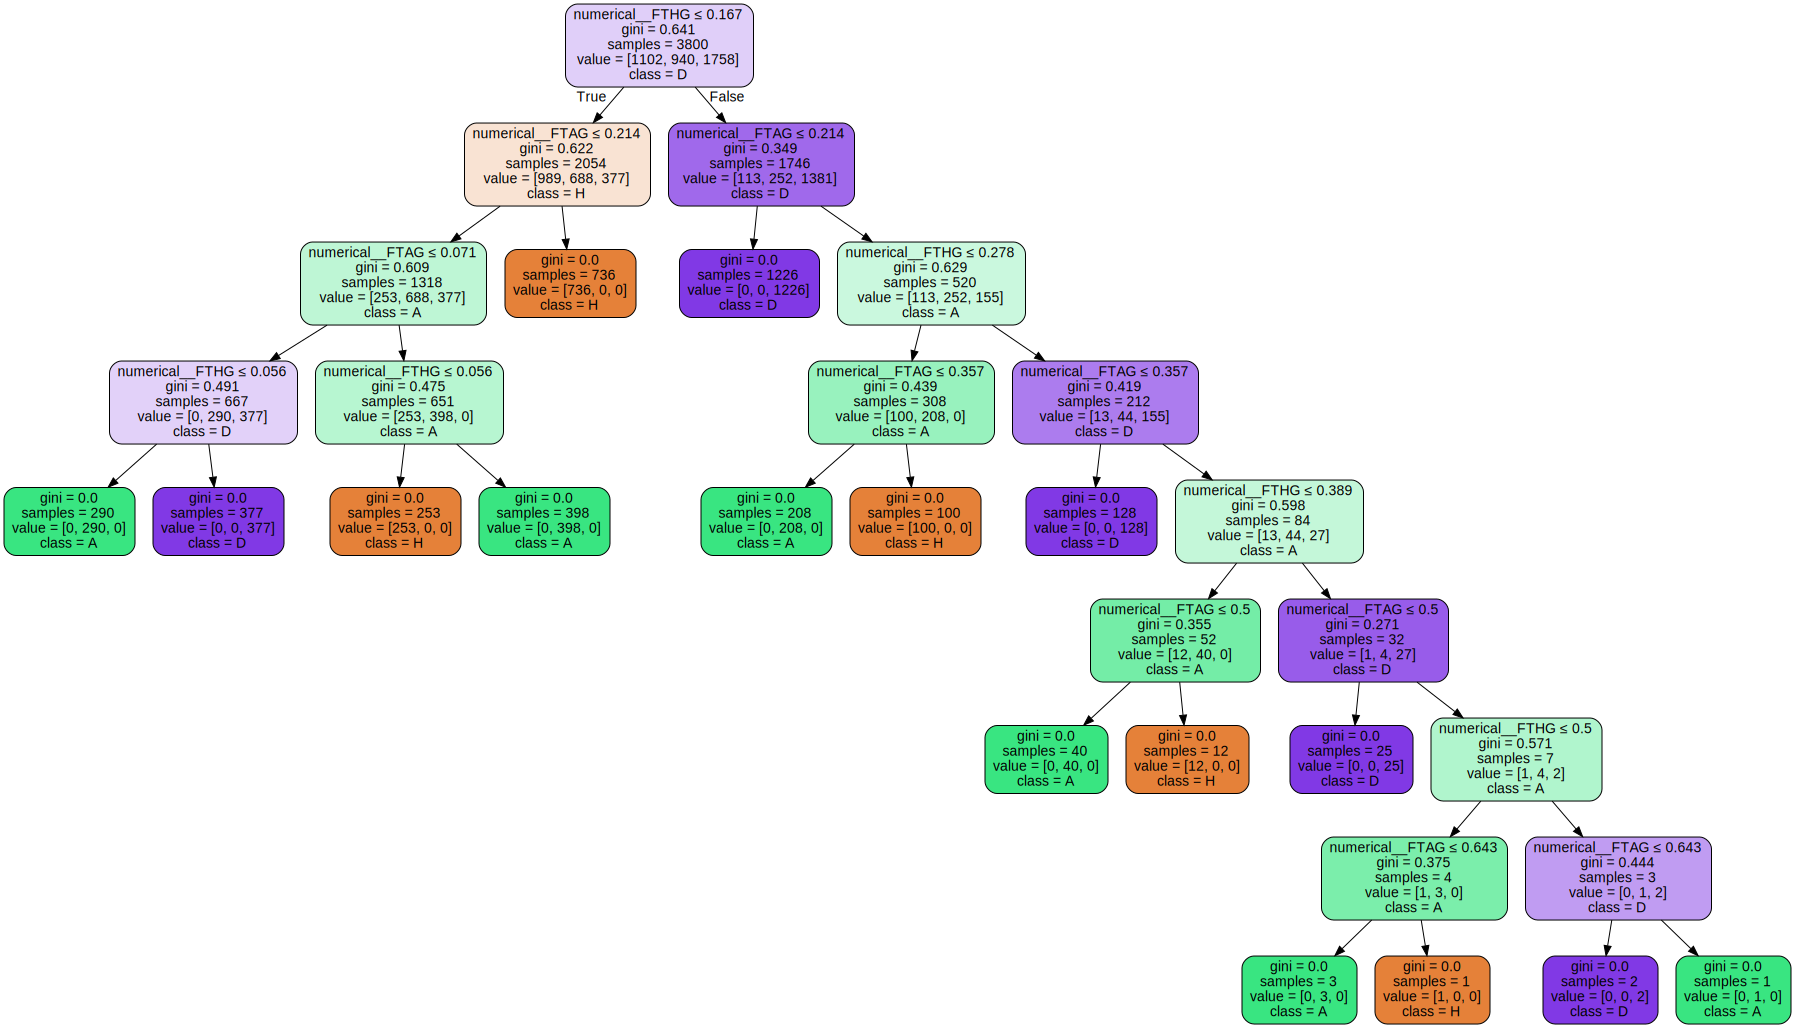

In [49]:
data = tree.export_graphviz(decision_Tree_class, out_file=None, 
                         feature_names=column_names,  
                         class_names=target_cat,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(data)  
graph 

### **Classification**

Implementing Muller Loop to run it on the training dataset against following algorithms:

1.   NaiveBayes Classifier
2.   KNN Classifier
3.   RandomForest Classifier
4.   XGB Classifier
5. DecisionTreeClassifier

In [51]:
class_algo = ["DecisionTreeClassifier", "RandomForest Classifier","KNN Classifier", 
         "NaiveBayes Classifier", 
         "XGB Classifier", ]

classifiers = [
    DecisionTreeClassifier(),
    ensemble.RandomForestClassifier(),
    KNeighborsClassifier(),
    GaussianNB(),
    XGBClassifier(),
    ]

max_score = 0.0
max_class = ''
score_list = []
clf_list = []

# iterate over classifiers
for algo, clf in zip(class_algo, classifiers):
    start_time = time.time()
    clf.fit(X_train, y_train)
    score = 100.0 * clf.score(X_test, y_test)
    score_list.append(score)
    clf_list.append(algo)
    print('Classification  Algorithm = %s, Score (test, accuracy) = %.2f,' %(algo, score), 'Training time = %.2f seconds' % (time.time() - start_time))
    
    if score > max_score:
        clf_best = clf
        max_score = score
        max_class = algo


Classification  Algorithm = DecisionTreeClassifier, Score (test, accuracy) = 100.00, Training time = 0.00 seconds
Classification  Algorithm = RandomForest Classifier, Score (test, accuracy) = 99.41, Training time = 0.39 seconds
Classification  Algorithm = KNN Classifier, Score (test, accuracy) = 98.62, Training time = 0.12 seconds
Classification  Algorithm = NaiveBayes Classifier, Score (test, accuracy) = 67.70, Training time = 0.00 seconds
Classification  Algorithm = XGB Classifier, Score (test, accuracy) = 100.00, Training time = 0.60 seconds


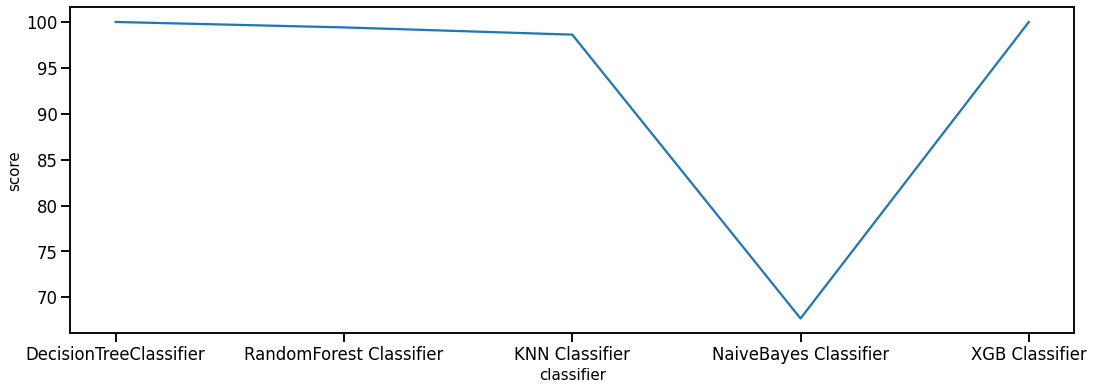

In [53]:
plt.figure(figsize=(18,6))
plt.plot(clf_list,score_list)
plt.xlabel("classifier",size=15,color="Black")
plt.ylabel("score",size=15,color="Black");

**K-Fold Technique**

In [54]:
'''
split the training dataset into 3 folds using KFold Technique 
and run the each fold against the give list of classfiers and check their accuracy.
'''
kf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

for train_index, test_index in kf.split(X, y):
    x_train_fold, x_test_fold = X[train_index], X[test_index]
    y_train_fold, y_test_fold = y[train_index], y[test_index]

    print(100*'*' )
    score = cross_val_score(ensemble.RandomForestClassifier(random_state= 42), x_train_fold, y_train_fold, cv= kf, scoring="accuracy")
    print(f'RandomForestClassifier Scores for each fold are: {score}')
    print(f'RandomForestClassifier Average score: {"{:.2f}".format(score.mean())}')
    print(100*'-' )

    score = cross_val_score(GaussianNB(), x_train_fold, y_train_fold, cv= kf, scoring="accuracy")
    print(f'GaussianNB Scores for each fold are: {score}')
    print(f'GaussianNB Average score: {"{:.2f}".format(score.mean())}')
    print(100*'-' )
    score = cross_val_score(XGBClassifier(), x_train_fold, y_train_fold, cv= kf, scoring="accuracy")
    print(f'XGBClassifier Scores for each fold are: {score}')
    print(f'XGBClassifier Average score: {"{:.2f}".format(score.mean())}')

    print(100*'-' )
    score = cross_val_score(KNeighborsClassifier(n_neighbors = 5),x_train_fold, y_train_fold, cv=kf, scoring='accuracy')
    print(f'KNeighborsClassifier Scores for each fold are: {score}')
    print(f'KNeighborsClassifier Average score: {"{:.2f}".format(score.mean())}')

    print(100*'-' )
    score = cross_val_score(DecisionTreeClassifier(),x_train_fold, y_train_fold, cv=kf, scoring='accuracy')
    print(f'DecisionTreeClassifier Scores for each fold are: {score}')
    print(f'DecisionTreeClassifier Average score: {"{:.2f}".format(score.mean())}')


****************************************************************************************************
RandomForestClassifier Scores for each fold are: [0.99526627 0.992891   0.992891  ]
RandomForestClassifier Average score: 0.99
----------------------------------------------------------------------------------------------------
GaussianNB Scores for each fold are: [0.65680473 0.70734597 0.70616114]
GaussianNB Average score: 0.69
----------------------------------------------------------------------------------------------------
XGBClassifier Scores for each fold are: [1.         0.99763033 0.99763033]
XGBClassifier Average score: 1.00
----------------------------------------------------------------------------------------------------
KNeighborsClassifier Scores for each fold are: [0.98224852 0.97630332 0.98578199]
KNeighborsClassifier Average score: 0.98
----------------------------------------------------------------------------------------------------
DecisionTreeClassifier Scores for

Finalize the outcome depending on voting and using the output of all the models.

In [62]:
classifiers_list = [('knn', KNeighborsClassifier()),
            ('naive bayes classifier', GaussianNB()),
            ('random forst classifier', ensemble.RandomForestClassifier()),
            ('XGB Classifier', XGBClassifier())]

In [63]:
voting_classifier_model = VotingClassifier(classifiers_list, voting='soft')
voting_classifier_model.fit(X_train, y_train)

y_pred = voting_classifier_model.predict(X_test)
print(f"Voting Classifier's accuracy: {accuracy_score(y_pred, y_test):.2f}")

Voting Classifier's accuracy: 0.99


Result

In [64]:
predicted_result = classification_report(y_test, y_pred)
print(predicted_result)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       425
           1       1.00      0.98      0.99       370
           2       1.00      1.00      1.00       725

    accuracy                           0.99      1520
   macro avg       0.99      0.99      0.99      1520
weighted avg       0.99      0.99      0.99      1520



Confusion matrix

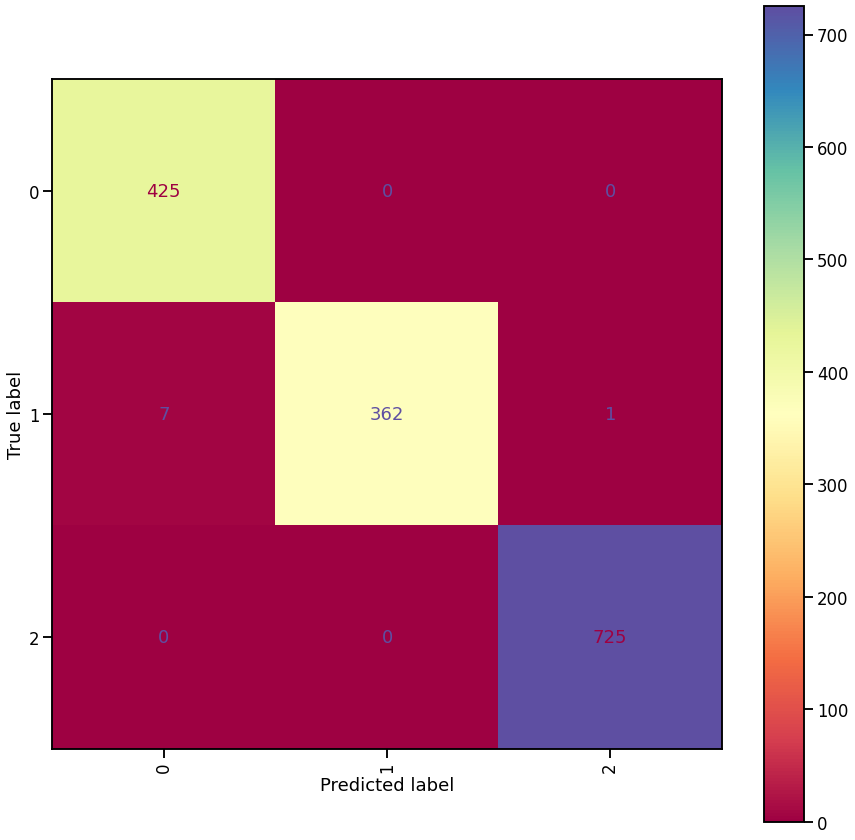

In [67]:
con_matrix = confusion_matrix(y_test, y_pred, labels=voting_classifier_model.classes_)
figure, axes = plt.subplots(1, figsize=(15,15))
disp = ConfusionMatrixDisplay(confusion_matrix=con_matrix, display_labels=voting_classifier_model.classes_)
disp.plot(ax = axes, xticks_rotation='vertical',cmap = "Spectral")